In [2]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
import statistics
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
#import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from utils import *
%matplotlib inline

In [3]:
train = pd.read_csv("../data/train_wikipedia_pre_clean.csv")
test = pd.read_csv("../data/test_wikipedia_pre_clean.csv")
test_y = pd.read_csv("../data/test_labels_wikipedia_pre_clean.csv")

In [4]:
#X = train.loc[train['toxic'] == 1, 'comment_text'] 
X = train['comment_text'] 
Y = train['toxic']

In [5]:
X  = X.apply(lambda x: x.encode("latin-1","ignore").decode('ISO-8859-1'))

# numbers
X  = X.apply(lambda x: x.encode("ascii","ignore").decode('ISO-8859-1'))
X = X.apply(lambda x: re.sub(r'[0-9]+', '', x))

# Stock market tickers $GE
X = X .apply(lambda x: re.sub(r'\$\w*', '', x))

# remove hashtags
X  = X.apply(lambda x: re.sub(r'#', '', x))


Preprocess

In [6]:
def tweettokenizer(text):
    tt = TweetTokenizer(preserve_case=True, strip_handles=True,
                            reduce_len=True)
    return tt.tokenize(text)
print('Vectorizing and Tokenizing...')
analyzer = TfidfVectorizer(min_df=20, 
                        ngram_range=(1,1), stop_words='english', 
                        tokenizer=tweettokenizer, 
                        lowercase=True).build_analyzer()

vect = TfidfVectorizer()
X_vect = vect.fit_transform(X)
print('Done!')


Vectorizing and Tokenizing...
Done!


In [7]:
print("Vocabulary length = {}".format(len(vect.vocabulary_)))

Vocabulary length = 287195


In [8]:
# Train the model
model = LogisticRegression(max_iter=1500)
model.fit(X_vect, Y)


LogisticRegression(max_iter=1500)

In [9]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model (from lowest to highest values)
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1]
# so the list returned is in order of largest to smallest
print("Largest Coefs: \n{}".format(feature_names[sorted_coef_index[:-300:-1]]))

Largest Coefs: 
['fuck' 'stupid' 'idiot' 'shit' 'fucking' 'asshole' 'ass' 'bitch' 'idiots'
 'bullshit' 'suck' 'penis' 'faggot' 'dick' 'crap' 'fucked' 'moron' 'sucks'
 'bastard' 'cunt' 'idiotic' 'nigger' 'jerk' 'fucker' 'gay' 'stupidity'
 'dumbass' 'motherfucker' 'pussy' 'shut' 'assholes' 'kill' 'damn' 'fag'
 'hell' 'whore' 'sex' 'dickhead' 'niggers' 'pathetic' 'vagina' 'cock'
 'morons' 'you' 'anal' 'dumb' 'bitches' 'fuckin' 'retarded' 'faggots'
 'fool' 'retard' 'loser' 'jackass' 'ignorant' 'die' 'nigga' 'hate' 'arse'
 'fuckers' 'racist' 'dicks' 'pig' 'garbage' 'douchebag' 'balls'
 'ridiculous' 'goddamn' 'fuk' 'scum' 'fucks' 'liar' 'wanker' 'hypocrite'
 'anus' 'bastards' 'moronic' 'cum' 'bloody' 'disgusting' 'homo' 'fuckhead'
 'rape' 'ugly' 'fck' 'homosexual' 'dirty' 'your' 'piece' 'dipshit'
 'fcking' 'nerd' 'butt' 'piss' 'cocksucker' 'fat' 'tits' 'nazi' 'boobs'
 'pedophile' 'arsehole' 'sick' 'jerks' 'wtf' 'motherfucking' 'prick'
 'sucking' 'off' 'slut' 'bunch' 'nazis' 'rubbish' 'arroga

In [10]:
EVIL_WORDS = feature_names[sorted_coef_index[:-300:-1]]

Make list with word according to their frequency

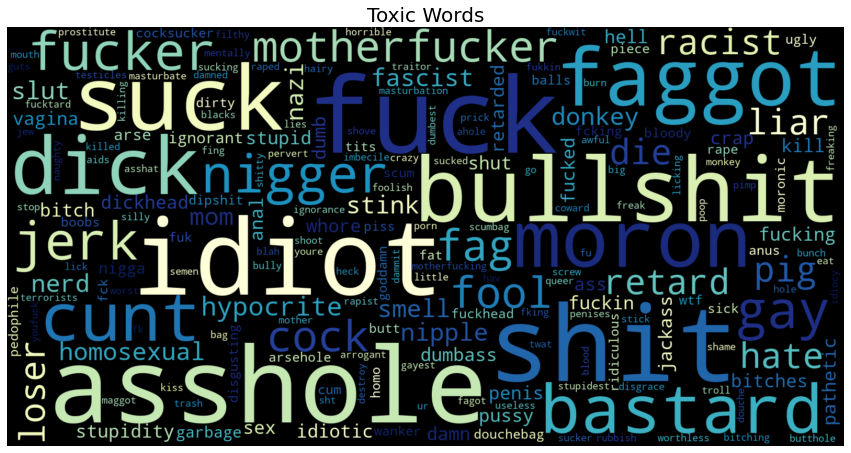

In [40]:
EVIL_WORDS


EVIL_WORDS
neg_text = pd.Series(EVIL_WORDS).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,
                        max_font_size=200, collocations=False).generate(neg_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.recolor(colormap="YlGnBu"), interpolation='bilinear')
plt.axis("off")
plt.title(f"Toxic Words", size=20)
plt.show()


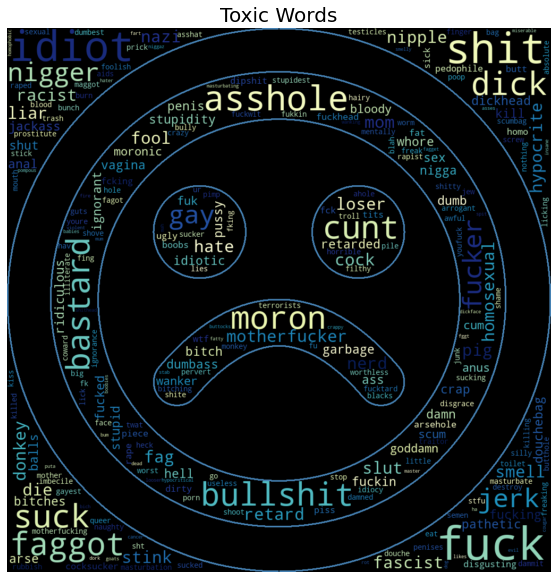

In [48]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# # Read the whole text.
# text = EVIL_WORDS

# # read the mask image
# # taken from
# # http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
# alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

# stopwords = set(STOPWORDS)
# stopwords.add("said")

# wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
#                stopwords=stopwords, contour_width=3, contour_color='steelblue')

# # generate word cloud
# wc.generate(text)

# # store to file
# wc.to_file(path.join(d, "alice.png"))

# # show
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()



d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
alice_mask = np.array(Image.open(path.join(d, "sad.png")))
neg_text = pd.Series(EVIL_WORDS).str.cat(sep=' ')
wordcloud = WordCloud(background_color="black", max_words=2000, mask=alice_mask,
                stopwords=stopwords, contour_width=3, contour_color='steelblue').generate(neg_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.recolor(colormap="YlGnBu"), interpolation='bilinear')
plt.axis("off")
plt.title(f"Toxic Words", size=20)
plt.show()


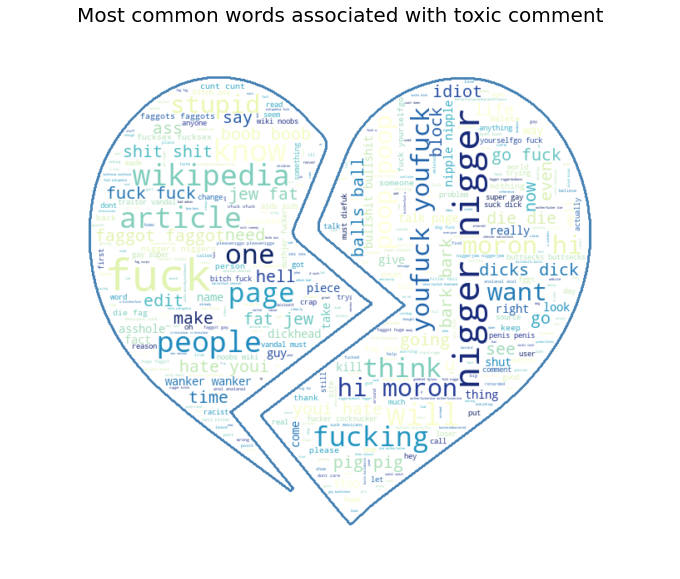

In [43]:
# interactive visual : enter the label name.
def W_Cloud():
    """
    Visualize the most common words contributing to the token.
    """
    threat_context = train[train['toxic'] == 1]
    threat_text = threat_context.comment_text
    threat_text = threat_text.apply(lambda x: x.lower())

    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
                stopwords=stopwords, contour_width=3, contour_color='steelblue').generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="YlGnBu"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words associated with toxic comment", size=20)
    plt.show()
token = 'toxic'
W_Cloud()